In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from numpy import random
import imageio

In [2]:
#Save plot and make them a GIF
def SavePlot(title):
    txt='{}.png'.format(title)
    plt.savefig(txt)
    return txt
def GIF(filenames,title,duration=0.1):
    images=[]
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave('{}.gif'.format(title),images,duration=duration)


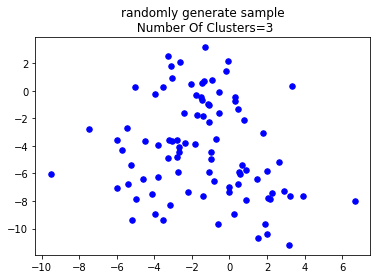

In [3]:

#total data size
size=90
#number of clusters
NumOfClusters=3
#cluster_std
std=2
#color1
c1=np.array(['b','r'])
#dot size on plot
dotsize=30

#convert y into predefined colors
def Color(y,colors):
    n=y.astype('str_')
    a=np.copy(np.unique(y))
    i=len(a)
    for i in range(i):
        for j in range(len(y)):
            if y[j]==a[i]:
                n[j]=colors[i]
    return n


#generate and plot data
x, y_true = make_blobs(n_samples=size, centers=NumOfClusters,
                       cluster_std=std)
plt.scatter(x[:, 0], x[:, 1],c=c1[0],s=dotsize)
plt.title('randomly generate sample\n Number Of Clusters={}'.format(NumOfClusters))

#filenames
filenames=[]
filenames.append(SavePlot('Generate sample'))
#monitor center movement
centers=[]

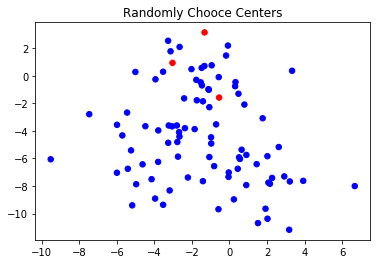

In [4]:
#randomly chooce center
choice=random.choice(size,NumOfClusters)
#alternatively choice=random.randint(0,size,NumOfClusters) is also ok

#show centers on the scatter plot
def ShowCenters(indexes,c1):
    y=np.zeros(size)
    
    for i in indexes:
        y[i]=1
    plt.scatter(x[:,0],x[:,1],c=Color(y,c1),s=dotsize)
ShowCenters(choice,c1)
plt.title('Randomly Chooce Centers')
filenames.append(SavePlot('Randomly Chooce Center'))
centers.append(SavePlot('Randomly Chooce Center'))

In [5]:
#assign points to clusters
def Assign(x,indexes):
    y=np.zeros(len(x[:,0]))
    ymodified=np.zeros(len(x[:,0]))
    for m in range(len(x[:,0])):
        norms=[]
        for i in indexes:
            norms.append(np.linalg.norm(x[m]-x[i]))
        y[m]=np.where(norms==min(norms))[0][0]+1
        if m not in indexes:
            norms=[]
            for i in indexes:
                norms.append(np.linalg.norm(x[m]-x[i]))
            ymodified[m]=np.where(norms==min(norms))[0][0]+1
        else:
            ymodified[m]=0
    return y,ymodified

#move centers to cluster average
def Move(x,y):
    u=np.copy(np.unique(y))
    output=np.copy(y)
    for i in u:
        minimum=100
        mean=np.mean(x[y==i],axis=0)
        for m in range(len(x)):
            if minimum>np.linalg.norm(mean-x[m]):
                index=m
                minimum=np.linalg.norm(mean-x[m])
        output[index]=0
    return output


In [6]:
#c2 now supports 5 centers, if NumberOfCenters exceeds 5, please add more color
c2=['r','y','purple','g','orange','black']
picindex=1


while True:
    b=False
    y,ym=Assign(x,choice)
    plt.scatter(x[:,0],x[:,1],c=Color(ym,c2),s=dotsize)
    plt.title('assign data to clusters \n{}'.format(picindex))
    filenames.append(SavePlot('assign data to clusters{}'.format(picindex)))
    plt.clf()
    newy=Move(x,y)

    #if centers are the same as previous ones, k means clusting is done.
    
    compare=choice==np.where(newy==0)[0]
    if np.all(compare):
        picindex='Convergence. Clustering Done'
        b=True
    if b==True:
        plt.scatter(x[:,0],x[:,1],c=Color(newy,c2),s=dotsize)
    else:
        ShowCenters(np.where(newy==0)[0],c1)
    plt.title('Move Centers\n{}'.format(picindex))
    filenames.append(SavePlot('Move Centers{}'.format(picindex)))
    centers.append(SavePlot('Move Centers{}'.format(picindex)))
    plt.clf()
        
    if b==True:
        break
    choice=np.where(newy==0)[0]
    picindex+=1
GIF(filenames,'K_means clustering visualization using numpy and pyplot',2)
GIF(centers,'Center Movement',2)

<Figure size 432x288 with 0 Axes>